In [1]:
%pylab inline
import os
import pandas as pd
import numpy as np
import sys



from sklearn.preprocessing import LabelBinarizer
import imgaug as ia
import imgaug.augmenters as iaa
import random
import cv2
from matplotlib import pyplot as plt
import glob
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras import optimizers

PARENT_DIR = os.path.dirname(os.getcwd())
sys.path.insert(1, PARENT_DIR+"\\scripts")
import utilities

PARENT_DIR

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


'D:\\DS_projects\\trafficsignclassification'

In [2]:
DATA_DIR = PARENT_DIR + "\\data\\"
OUT_DIR = PARENT_DIR + "\\output\\"
DEBUG_MOD = True # False #
MODEL_NAME = OUT_DIR + "model_part1.h5"

In [3]:
images_file_name = OUT_DIR + "images.pkl"
labels_file_name = OUT_DIR + "labels.pkl"

test_img_file_name = OUT_DIR + "test_img.pkl"
test_lbl_file_name = OUT_DIR + "test_lbl.pkl"

# parsing image

In [4]:
if not os.path.isfile(images_file_name):
    print("parsing images")
    # train data
    folder_path = DATA_DIR+"train"
    x_data, y_data = utilities.parse_files(folder_path, images_file_name, labels_file_name)
     # testing and error analysis
    folder_path = DATA_DIR+"test"
    x_test, y_test = utilities.parse_files(folder_path, test_img_file_name, test_lbl_file_name)
else:
    print("loading images")
    x_data, y_data = utilities.read_data(images_file_name, labels_file_name)
    x_test, y_test = utilities.read_data(test_img_file_name, test_lbl_file_name)

loading images


## checking data parsing done well

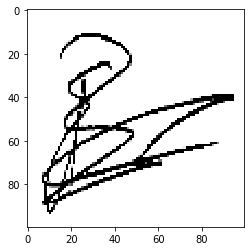

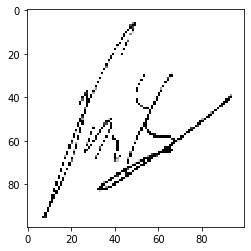

In [5]:
# check whether parsed data stored properly  
plt.imshow(x_data[0][:,:,0], cmap='gray',clim=(0,1))
plt.show()
plt.imshow(x_test[0][:,:,0], cmap='gray',clim=(0,1))
plt.show()

## train validation seperation

In [7]:
# train validation seperation
x_train, x_val, y_train, y_val, n_class = utilities.seperate_train_validation_data(x_data, y_data)

number of data for each class: [[ 1 12]
 [ 2 12]
 [ 3 12]
 [ 4 12]
 [ 6 12]
 [ 7 12]
 [ 8 12]
 [ 9 11]
 [10 12]
 [11 12]
 [12 12]
 [14 12]
 [15 12]
 [16 12]
 [17 12]
 [18  6]
 [19 12]
 [20 12]
 [21 12]
 [22 12]
 [23 12]
 [24 12]
 [26 12]
 [27 12]
 [28 12]
 [29 12]
 [30 12]
 [31 12]
 [33 12]
 [35 12]
 [37 12]
 [39 12]
 [41 12]
 [42 12]
 [43 12]
 [44 12]
 [45 12]
 [46 12]
 [47 12]
 [49 12]
 [51 12]
 [53 12]
 [54 12]
 [55 11]
 [56 12]
 [58 12]
 [59 12]
 [62 12]
 [63 12]
 [64 12]
 [66 12]
 [67 12]
 [68 12]
 [69 12]
 [70 12]
 [71 12]
 [72 12]
 [73 12]
 [74 12]
 [75 12]
 [77 12]
 [79 12]]
unique labels [ 1  2  3  4  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 26 27
 28 29 30 31 33 35 37 39 41 42 43 44 45 46 47 49 51 53 54 55 56 58 59 62
 63 64 66 67 68 69 70 71 72 73 74 75 77 79]
n_class: 79


# Build model
## Design of model
Our Architecture is as follows:

conv => max pool => dropout => conv => max pool => dropout => fully connected => fully connected

But depending on the performance, this architecture was changed and hyperparameter tuning was also done.


since there are more than 2 classes to detect, categorical cross_entropy is used as loss function whose equation is below:
![cce](cce.png)

**Activation functions:** are selected as ReLU in order to cancel out vanishing gradient and provide non linearity to model. But the last Dense layer activation must be chosen as softmax because its normalized form of values so, it can be said that it also shows the probability of each class to be.  

there are also other criterias for multi class classification


* optimizer : adam, RMSprop and SGD after all trials 
    * SGD: best val_accuracy =  0.67656
    * adam: best val_accuracy =  0.8649
    * RMSprop: best val_accuracy =  0.93541
    
## Fine tuning
there are two options for hyper tuning
* reduce fixed image size
* reduce filter number

initially fixed_img_size = (200,200)
filter number first conv =  64
filter number first conv =  128

after many trials best conf
initially fixed_img_size = (100,100)
filter number first conv =  4
filter number first conv =  8

In [8]:
MODEL_NAME = OUT_DIR + "cnn_model.h5"
b_build_model =     False # True #
if b_build_model:
    model = utilities.build_and_fit_cnn_model(x_train, y_train, x_val,y_val, n_class, MODEL_NAME)
else:
    img_shape = x_train[0].shape
    model, call_backs = utilities.initialize_cnn_model(img_shape, n_class, MODEL_NAME)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 4)       104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)             

In [9]:
from keras.models import Model
layer_name = 'flatten_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
#intermediate_output = intermediate_layer_model.predict(data)

In [10]:
# Predict the values from the validation dataset
y_pred = intermediate_layer_model.predict(x_test)
#y_pred = model.predict(x_test)

df = pd.DataFrame(y_pred)
df["y_test"] = y_test
df


0         1         2         3        4         5        6  \
0    0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
1    0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
2    0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
3    0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
4    0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
..        ...       ...       ...       ...      ...       ...      ...   
199  0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
200  0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
201  0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
202  0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   
203  0.049538  0.221873  0.277587  0.462631  0.10111  0.262806  0.42391   

            7       8         9  ...    4991      4992     4993      4994  \
0    0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
1    0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
2    0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
3    0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
4    0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
..        ...     ...       ...  ...     ...       ...      ...       ...   
199  0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
200  0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
201  0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
202  0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   
203  0.266906  0.0539  0.146427  ...  0.0209  0.027649  0.11277  0.158605   

         4995      4996      4997      4998      4999  y_test  
0    0.046747  0.042137  0.114182  0.177798  0.052729      80  
1    0.046747  0.042137  0.114182  0.177798  0.052729      80  
2    0.046747  0.042137  0.114182  0.177798  0.052729      80  
3    0.046747  0.042137  0.114182  0.177798  0.052729      80  
4    0.046747  0.042137  0.114182  0.177798  0.052729      80  
..        ...       ...       ...       ...       ...     ...  
199  0.046747  0.042137  0.114182  0.177798  0.052729     100  
200  0.046747  0.042137  0.114182  0.177798  0.052729     100  
201  0.046747  0.042137  0.114182  0.177798  0.052729     100  
202  0.046747  0.042137  0.114182  0.177798  0.052729     100  
203  0.046747  0.042137  0.114182  0.177798  0.052729     100  

[204 rows x 5001 columns]

## feature generation from this probabilities
* best component is chosen after many trials to get the highest auc value 

In [11]:
from scipy import sparse

from sklearn.decomposition import PCA

A =  df.iloc[:,:-1].values
pca = PCA(n_components=10) 

A_red = pca.fit_transform(A) #sparse.csr_matrix()
A_red[:20]

array([[ 1.6360586e+00, -4.3384414e+00, -2.3668191e+00, -4.2732760e-01,
        -6.2386608e+00, -1.9816190e-01, -2.3552740e+00, -1.4298512e+00,
        -1.6974788e+00,  1.8620887e+00],
       [ 2.6634259e+00, -5.3343201e+00, -2.5944266e+00,  4.2429309e+00,
        -4.7812047e+00, -6.9053155e-01, -2.0020456e+00,  1.3061715e+00,
        -1.0131432e+00,  2.9969444e+00],
       [ 2.4391506e+00, -6.5031991e+00, -3.7442291e+00,  4.2019897e+00,
        -2.7427580e+00, -1.7853225e+00, -2.9869297e+00, -1.8544190e+00,
        -3.0785038e+00,  2.8707657e+00],
       [ 3.6737545e+00, -2.2453115e+00,  4.4539070e-01, -2.0593040e+00,
        -6.2900434e+00, -5.0322491e-01, -8.9140058e-01,  4.4066849e-01,
         1.1699920e+00,  1.8596261e+00],
       [ 3.7651141e+00, -1.3053486e+00, -6.4677411e-01,  4.2718287e+00,
        -3.8762207e+00,  4.6890798e+00, -1.4452748e+00,  9.6866304e-01,
         2.1177118e+00,  3.0348461e+00],
       [ 2.7567396e+00, -3.1245098e+00,  9.9431390e-01, -1.0427829e+00,
   

In [12]:
cum_result_df = utilities.calculate_similarity_table(A_red, y_test)
cum_result_df.to_csv("similarity_table.csv")
cum_result_df.head(24)

person1  img1no  person2  img2no     score
0        80       0       80       1  0.903029
1        80       0       80       2  0.891305
2        80       0       80       3  0.890072
3        80       0       80       4  0.730920
4        80       0       80       5  0.872564
5        80       0       80       6  0.880901
6        80       0       80       7  0.904795
7        80       0       80       8  0.660127
8        80       0       80       9  0.942466
9        80       0       80      10  0.692812
10       80       0       80      11  0.670224
11       80       0       83      12  0.497680
12       80       0       83      13  0.388499
13       80       0       83      14  0.605231
14       80       0       83      15  0.252550
15       80       0       83      16  0.515471
16       80       0       83      17  0.517176
17       80       0       83      18  0.381149
18       80       0       83      19  0.546402
19       80       0       83      20  0.636751
20       80       0       83      21  0.623882
21       80       0       83      22  0.547034
22       80       0       83      23  0.649943
23       80       0       84      24  0.382489

## roc and auc analysis

roc_auc:  0.9703297846545035 best_thresh 0.7041360139846802


(          fpr       tpr     1-fpr       tf  thresholds
 678  0.085172  0.914439  0.914828 -0.00039    0.704136, 0.9703297846545035)

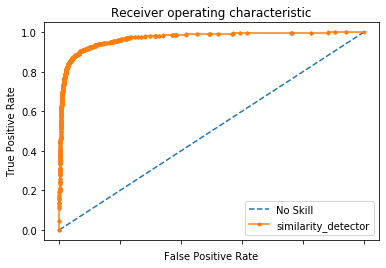

In [13]:
cum_result_df["gr_truth"] = cum_result_df["person1"] == cum_result_df["person2"]
cum_result_df["gr_truth"] = cum_result_df["gr_truth"].astype(int)
roc_auc, best_thresh, roc = utilities.plot_roc_curve(cum_result_df)
best_thresh, roc_auc

In [20]:
threshold = best_thresh["thresholds"].values[0]

result = utilities.similarity_prediction(cum_result_df, threshold)
result["pred"] = result["pred"].astype(int)
result["gr_truth"] = result["gr_truth"].astype(int)

result.head(24)

person1  img1no  person2  img2no     score  gr_truth  pred
0        80       0       80       1  0.903029         1     1
1        80       0       80       2  0.891305         1     1
2        80       0       80       3  0.890072         1     1
3        80       0       80       4  0.730920         1     1
4        80       0       80       5  0.872564         1     1
5        80       0       80       6  0.880901         1     1
6        80       0       80       7  0.904795         1     1
7        80       0       80       8  0.660127         1     0
8        80       0       80       9  0.942466         1     1
9        80       0       80      10  0.692812         1     0
10       80       0       80      11  0.670224         1     0
11       80       0       83      12  0.497680         0     0
12       80       0       83      13  0.388499         0     0
13       80       0       83      14  0.605231         0     0
14       80       0       83      15  0.252550         0     0
15       80       0       83      16  0.515471         0     0
16       80       0       83      17  0.517176         0     0
17       80       0       83      18  0.381149         0     0
18       80       0       83      19  0.546402         0     0
19       80       0       83      20  0.636751         0     0
20       80       0       83      21  0.623882         0     0
21       80       0       83      22  0.547034         0     0
22       80       0       83      23  0.649943         0     0
23       80       0       84      24  0.382489         0     0

best_thresh to optimize auc is 0.83

## precision recall plot analysis

Logistic: f1=0.538 auc=0.790
Best Threshold=0.852876, F-Score=0.748


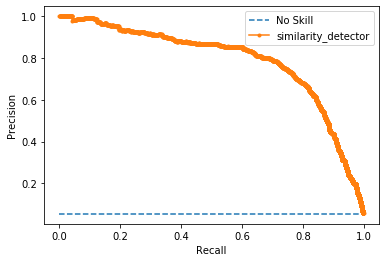

In [16]:
precision, recall, thresholds = utilities.plot_precision_recall_curve(result)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

* as seen in precision-recal, best threshold is 0.97. furthermore, it is also suitable for fraud case since the system precision is quite high and secure to run on real operations

### Confusion Matrix wrt best threshold of ROC analysis

In [17]:
from sklearn.metrics import classification_report
print(classification_report(result["gr_truth"], result["pred"]))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     19584
           1       0.38      0.91      0.54      1122

    accuracy                           0.91     20706
   macro avg       0.69      0.91      0.75     20706
weighted avg       0.96      0.91      0.93     20706



### Confusion Matrix wrt best threshold of precision recall curve analysis

In [18]:
threshold = thresholds[ix]

result = utilities.similarity_prediction(cum_result_df, threshold)
result["pred"] = result["pred"].astype(int)

print(classification_report(result["gr_truth"], result["pred"]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19584
           1       0.78      0.72      0.75      1122

    accuracy                           0.97     20706
   macro avg       0.88      0.85      0.87     20706
weighted avg       0.97      0.97      0.97     20706



### compare the model with 0.5 threshold

In [19]:
threshold = 0.5

result = utilities.similarity_prediction(cum_result_df, threshold)
result["pred"] = result["pred"].astype(int)

print(classification_report(result["gr_truth"], result["pred"]))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     19584
           1       0.12      0.99      0.21      1122

    accuracy                           0.59     20706
   macro avg       0.56      0.78      0.47     20706
weighted avg       0.95      0.59      0.70     20706



# Conclusion

* first of all, probability features are not **informative enough to seperate the new people** well as seen in roc curve and precision recall curve. Therefore, other feature generation approauch using the cnn_model with train data can be investigated. due to the lack of time , i could not optimize yet


* **in order to reduce fraud events**, you must get **the highest precision value of 1s**. in this case, thresh=0.5 results in the best precision value for 1s. Furthermore, **roc curve analysis threshold** is better than precision-recal curve's in 1's precision value.  